In [41]:
import math as mt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
from linearmodels import PanelOLS, BetweenOLS, FirstDifferenceOLS, PooledOLS
from linearmodels.panel import compare
%config InlineBackend.figure_format = 'svg'

<font size="3"> **Описательная статистика для набора данных для модели с рынком оружия**

In [115]:
#Импортирую датасет по оружию. Он представляет из себя панель из 149 наблюдений (стран) в каждом из 2-х периодов (2006, 2017).
suicides_df = pd.DataFrame(pd.read_excel("Data on civil firearm holdings, suicides and interpersonal violence.xlsx"))
suicides_df['gdp_pc'] = np.array(suicides_df['gdp_pc'].tolist())/1000


298

In [50]:
#Описательная статистика для всех имеющихся переменных
summary = suicides_df.describe()
summary = summary.transpose()
summary[1:][:]


,count,mean,std,min,25%,50%,75%,max
suicide,298.0,5.107930e+03,2.064459e+04,7.310849e+00,3.294525e+02,8.066400e+02,2.620465e+03,2.108691e+05
suicide_rate,298.0,1.062508e+01,7.618409e+00,2.301910e+00,5.676345e+00,7.899488e+00,1.298611e+01,4.732068e+01
interpersonal_violence,298.0,6.922624e+00,9.868591e+00,4.636161e-01,1.500453e+00,3.477170e+00,7.291752e+00,5.819249e+01
suicide_fa_rate,298.0,8.815136e-01,9.690915e-01,4.239135e-02,3.303276e-01,6.067883e-01,1.106801e+00,7.688307e+00
firearm,298.0,4.868797e+06,2.834798e+07,3.000000e+03,1.385000e+05,4.915000e+05,1.798250e+06,3.933470e+08
firearm_pc,298.0,1.040171e-01,1.273347e-01,3.098480e-04,2.023820e-02,6.649080e-02,1.415715e-01,1.209751e+00
pop,298.0,4.469886e+07,1.543662e+08,8.460000e+04,3.558199e+06,9.955866e+06,3.055770e+07,1.386395e+09
gdp,298.0,4.604211e+11,1.603124e+12,7.367610e+08,1.227588e+10,4.545166e+10,2.478300e+11,1.734860e+13
gdp_pc,298.0,1.441202e+01,1.974874e+01,2.141392e-01,1.738794e+00,5.455241e+00,1.782521e+01,1.094530e+02
dom_sav,298.0,2.080926e+01,1.782600e+01,-9.279172e+01,1.052164e+01,2.080057e+01,2.955506e+01,7.261964e+01


In [51]:
#Корреляционная матрица для всех имеющихся регрессоров
suicides_df.corr()[1:].transpose()[1:].transpose()

,suicide,suicide_rate,interpersonal_violence,suicide_fa_rate,firearm,firearm_pc,pop,gdp,gdp_pc,dom_sav,pop_den,u_sec_educ,fertility,internet,u
suicide,1.000000,0.170216,-0.017856,0.061243,0.364686,0.037820,0.945970,0.447107,-0.025445,0.126794,0.014495,-0.043807,-0.102412,-0.018599,-0.101559
suicide_rate,0.170216,1.000000,0.032220,0.377725,0.052538,0.137684,0.030599,0.118083,0.162614,0.061355,-0.034386,0.399458,-0.400680,0.234915,0.078127
interpersonal_violence,-0.017856,0.032220,1.000000,0.053850,0.000579,-0.049368,-0.035651,-0.053212,-0.258673,-0.191162,-0.080962,-0.176841,0.030442,-0.191000,0.112233
suicide_fa_rate,0.061243,0.377725,0.053850,1.000000,0.528317,0.700414,0.004529,0.435459,0.320087,-0.044278,-0.127469,0.256074,-0.210131,0.234759,0.098136
firearm,0.364686,0.052538,0.000579,0.528317,1.000000,0.627294,0.354435,0.863275,0.149041,0.015905,-0.022783,0.032074,-0.078395,0.106627,-0.058093
firearm_pc,0.037820,0.137684,-0.049368,0.700414,0.627294,1.000000,0.011197,0.518205,0.476210,0.106771,-0.078037,0.351952,-0.341894,0.380364,0.135610
pop,0.945970,0.030599,-0.035651,0.004529,0.354435,0.011197,1.000000,0.473408,-0.060490,0.131475,0.011435,-0.082965,-0.066380,-0.044673,-0.110352
gdp,0.447107,0.118083,-0.053212,0.435459,0.863275,0.518205,0.473408,1.000000,0.276264,0.084733,-0.007664,0.132821,-0.186118,0.226867,-0.076462
gdp_pc,-0.025445,0.162614,-0.258673,0.320087,0.149041,0.476210,-0.060490,0.276264,1.000000,0.400358,0.164768,0.633953,-0.451172,0.655619,-0.120368
dom_sav,0.126794,0.061355,-0.191162,-0.044278,0.015905,0.106771,0.131475,0.084733,0.400358,1.000000,0.147903,0.337692,-0.248505,0.232678,-0.083776


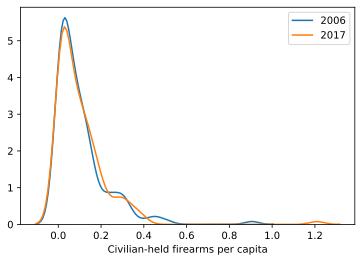

In [123]:
sns.distplot(suicides_df.loc[0:suicides_df.shape[0]/2, "firearm_pc"], norm_hist=True, hist = False, axlabel = "Civilian-held firearms per capita", label ="2006")
sns.distplot(suicides_df.loc[suicides_df.shape[0]/2:, "firearm_pc"], norm_hist=True, hist = False, axlabel = "Civilian-held firearms per capita", label ="2017")

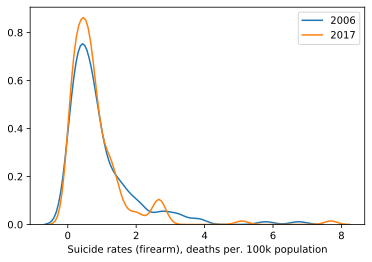

In [124]:
sns.distplot(suicides_df.loc[0:suicides_df.shape[0]/2, "suicide_fa_rate"], norm_hist=True, hist = False, axlabel = "Suicide rates (firearm), deaths per. 100k population", label ="2006")
sns.distplot(suicides_df.loc[suicides_df.shape[0]/2:, "suicide_fa_rate"], norm_hist=True, hist = False, axlabel = "Suicide rates (firearm), deaths per. 100k population", label ="2017")

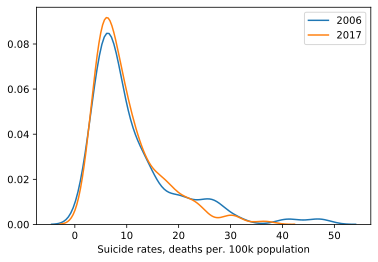

In [125]:
sns.distplot(suicides_df.loc[0:suicides_df.shape[0]/2, "suicide_rate"], norm_hist=True, hist = False, axlabel = "Suicide rates, deaths per. 100k population", label ="2006")
sns.distplot(suicides_df.loc[suicides_df.shape[0]/2:, "suicide_rate"], norm_hist=True, hist = False, axlabel = "Suicide rates, deaths per. 100k population", label ="2017")

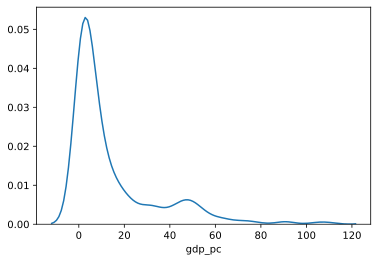

In [107]:
sns.distplot(suicides_df["gdp_pc"], norm_hist=True, hist = False)

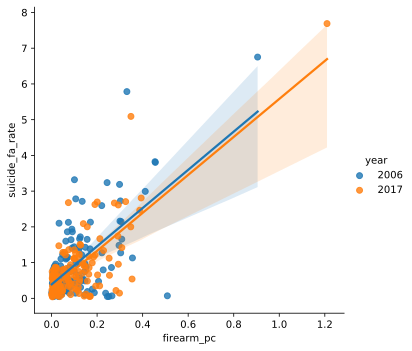

In [52]:
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df, hue = "year")

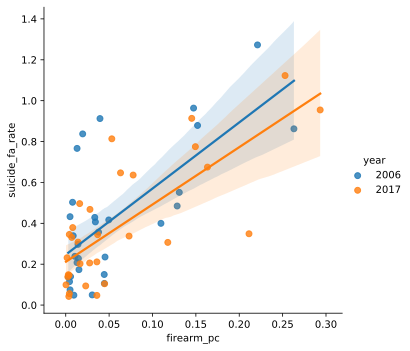

In [53]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека (регион: Азия)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="Asia-Pacific"], hue = "year")


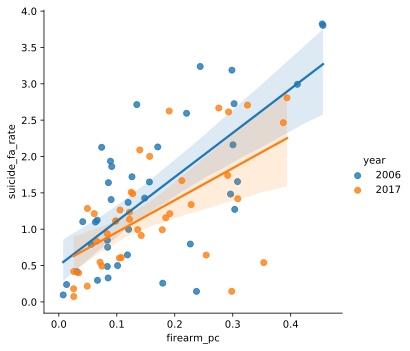

In [54]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека  (регион: Европа)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="Europe"], hue = "year")


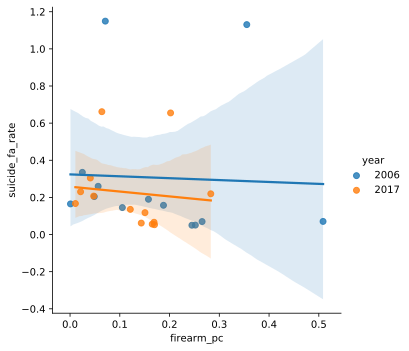

In [55]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека  (регион: Центральная и северо-восточная Африка)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="Middle East-North Africa"], hue = "year")

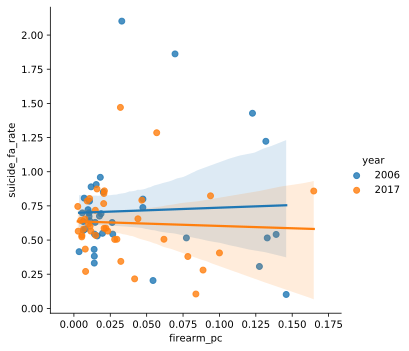

In [56]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека  (регион: Африка южнее Сахары)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="Sub-Saharan Africa"], hue = "year")

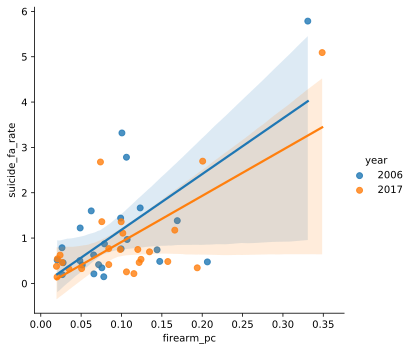

In [57]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека  (регион: Латинская Америка и Каррибы)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="Latin America-Caribbean"], hue = "year")

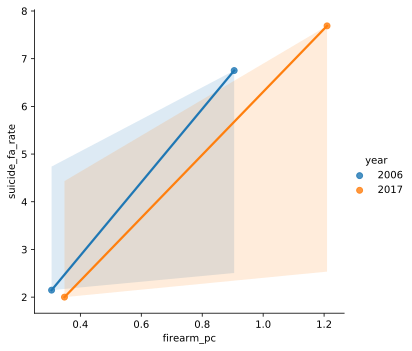

In [58]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от оценок количества гражданского оружия в стране на человека  (регион: Северная Америка)
sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df[suicides_df['region']=="North America"], hue = "year")

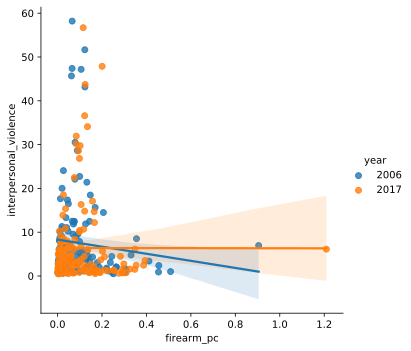

In [59]:
#Стротися точечная диаграмма смертей от межличностного насилия в зависимости от оценок количества гражданского оружия в стране на человека 
sns.lmplot(x = "firearm_pc", y = "interpersonal_violence", data = suicides_df, hue = "year")

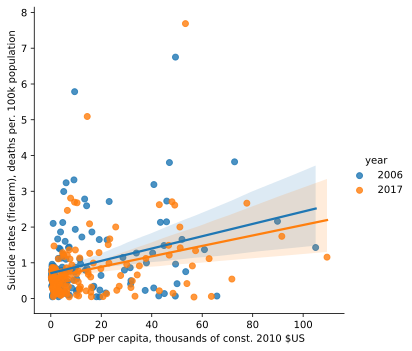

In [82]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от ВВП на душу населения
suicide_fa_gdp_gun = sns.lmplot(x = "gdp_pc", y = "suicide_fa_rate", data = suicides_df,hue = "year")
suicide_fa_gdp_gun.set(xlabel='GDP per capita, thousands of const. 2010 $US', ylabel='Suicide rates (firearm), deaths per. 100k population')

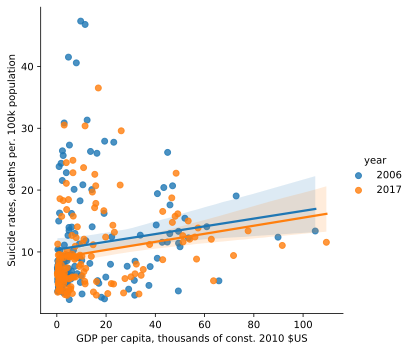

In [126]:
#Стротися точечная диаграммасамоубийств с помощью огнестрельного оружия в зависимости от ВВП на душу населения
suicide_gdp_gun = sns.lmplot(x = "gdp_pc", y = "suicide_rate", data = suicides_df,hue = "year")
suicide_gdp_gun.set(xlabel='GDP per capita, thousands of const. 2010 $US', ylabel='Suicide rates, deaths per. 100k population')

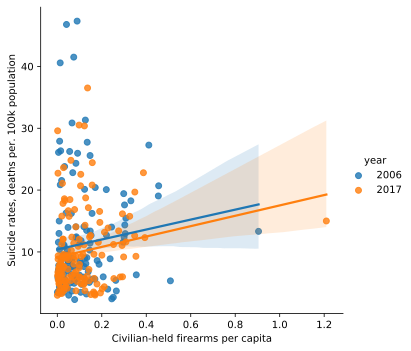

In [127]:
#Стротися точечная диаграмма самоубийств в зависимости от ВВП на душу населения
suicide_firearm_gun = sns.lmplot(x = "firearm_pc", y = "suicide_rate", data = suicides_df, hue = "year")
suicide_firearm_gun.set(xlabel='Civilian-held firearms per capita', ylabel='Suicide rates, deaths per. 100k population')

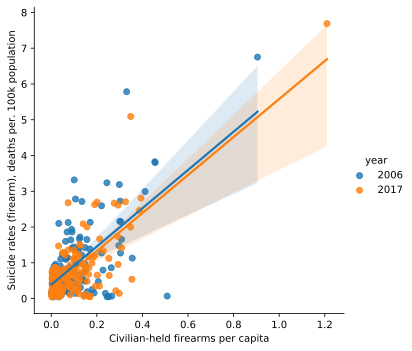

In [87]:
#Стротися точечная диаграммасамоубийств с помощью огнестрельного оружия в зависимости от гражданского огнестрельного оружия в стране
suicide_fa_firearm_gun = sns.lmplot(x = "firearm_pc", y = "suicide_fa_rate", data = suicides_df, hue = "year")
suicide_fa_firearm_gun.set(xlabel='Civilian-held firearms per capita', ylabel='Suicide rates (firearm), deaths per. 100k population')

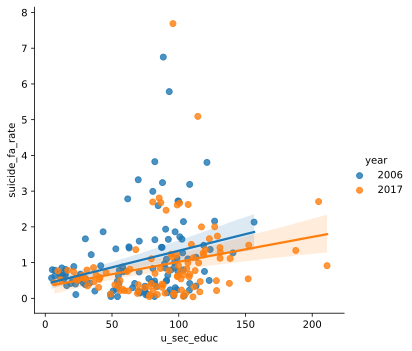

In [61]:
#Стротися точечная диаграмма самоубийств с помощью огнестрельного оружия в зависимости от доли вовлеченных в образование в старшей школе.
sns.lmplot(x = "u_sec_educ", y = "suicide_fa_rate", data = suicides_df, hue = "year")

<font size="3"> **Здесь будут построены регрессии для модели с рынком оружия**

In [17]:
panel_fa = suicides_df.set_index(['location', 'year'])
regions = ['Asia_Pacific', 'Europe', 'Latin_America_Caribbean', 'Middle_East_North_Africa', 'North_America', 'Sub_Saharan_Africa']
panel_fa[regions] = pd.get_dummies(panel_fa['region'])


In [18]:
#Здесь я хотел воспользоваться инструментальными переменными для получения теоретических значений количесва оружия на человека в стране 
#и их дальнейшего использования в регрессии с суицидами, это казалось неплохим решением, однако для хорошей оценки необходимы временные 
#эффекты, которые нейтрализуют большУю часть взаимосвязи с другими регрессорами, что противоречит теоретическим основаним, и т.д. и т.п., 
#всё получается ещё более грубо, поэтому от этой идеи пришлось отказаться.
#firearm_pc_th = PanelOLS.from_formula('firearm_pc ~ 1 + gdp_pc + interpersonal_violence + internet + u + gdp_pc + EntityEffects + TimeEffects', panel_fa)
#res_fa_pc_th = firearm_pc_th.fit(cov_type='heteroskedastic', has_constant = True)
#panel_fa['firearm_pc_th'] = res_fa_pc_th.fitted_values[['fitted_values']]

fe_suicide_fa = PanelOLS.from_formula('suicide_fa_rate ~ 1 + firearm_pc + interpersonal_violence + fertility + internet + u + gdp_pc + EntityEffects', panel_fa)
fe_suicide_fa_educ = PanelOLS.from_formula('suicide_fa_rate ~ 1 + firearm_pc + interpersonal_violence + fertility + internet + u + gdp_pc + u_sec_educ + EntityEffects', panel_fa)
fe_suicide = PanelOLS.from_formula('suicide_rate ~ 1 + firearm_pc + interpersonal_violence + fertility + internet + u + gdp_pc + EntityEffects', panel_fa)
fe_suicide_educ = PanelOLS.from_formula('suicide_rate ~ 1 + firearm_pc + interpersonal_violence + fertility + internet + u + gdp_pc + u_sec_educ + EntityEffects', panel_fa)
res_fe_suicide_fa = fe_suicide_fa.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_suicide_fa_educ = fe_suicide_fa_educ.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_suicide = fe_suicide.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_suicide_educ = fe_suicide_educ.fit(cov_type='heteroskedastic', has_constant = True)
print(res_fe_suicide_fa)
print(res_fe_suicide_fa_educ)
print(res_fe_suicide)
print(res_fe_suicide_educ)

c:\users\максим\appdata\local\programs\python\python37\lib\site-packages\linearmodels\utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:        suicide_fa_rate   R-squared:                        0.4011
Estimator:                   PanelOLS   R-squared (Between):             -0.1785
No. Observations:                 292   R-squared (Within):               0.4011
Date:                Thu, Mar 26 2020   R-squared (Overall):             -0.1618
Time:                        10:58:21   Log-likelihood                    214.05
Cov. Estimator:                Robust                                           
                                        F-statistic:                      15.401
Entities:                         148   P-value                           0.0000
Avg Obs:                       1.9730   Distribution:                   F(6,138)
Min Obs:                       1.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             9.2538
                            

In [19]:
print(compare({'Suicide (firearm) #1':res_fe_suicide_fa, 'Suicide (firearm) #2':res_fe_suicide_fa_educ,'Suicide #1':res_fe_suicide,'Suicide #2':res_fe_suicide_educ}))

                                           Model Comparison                                           
                           Suicide (firearm) #1 Suicide (firearm) #2       Suicide #1       Suicide #2
------------------------------------------------------------------------------------------------------
Dep. Variable                   suicide_fa_rate      suicide_fa_rate     suicide_rate     suicide_rate
Estimator                              PanelOLS             PanelOLS         PanelOLS         PanelOLS
No. Observations                            292                  215              292              215
Cov. Est.                                Robust               Robust           Robust           Robust
R-squared                                0.4011               0.4767           0.4520           0.4912
R-Squared (Within)                       0.4011               0.4767           0.4520           0.4912
R-Squared (Between)                     -0.1785               0.0107     

In [20]:
panel_fa.columns

Index(['region', 'suicide', 'suicide_rate', 'interpersonal_violence',
       'suicide_fa_rate', 'firearm', 'firearm_pc', 'pop', 'gdp', 'gdp_pc',
       'dom_sav', 'pop_den', 'u_sec_educ', 'fertility', 'internet', 'u',
       'Asia_Pacific', 'Europe', 'Latin_America_Caribbean',
       'Middle_East_North_Africa', 'North_America', 'Sub_Saharan_Africa'],
      dtype='object')

<font size="3"> **Модели с социально-экономическими показателями**

In [35]:
#Импортирую датасет для моделей с gdp_pc and . Он представляет из себя панель из 69 наблюдений (стран) в каждом из 15-ти периодов (2000 -- 2014).
main_df = pd.DataFrame(pd.read_excel("Panel on suicides and socio-economic factors.xlsx", na_values = ''))
panel = main_df.set_index(['country', 'year'])

In [36]:
#Добавлю в панель лаги ВВП, безработицы, и изменение ВВП первого порядка
panel['gdp_pc'] = np.array(panel['gdp_pc'].tolist())/1000 #перевожу в тысячи долларов
main_df['gdp_pc_th'] = np.array(main_df['gdp_pc'].tolist())/1000 #перевожу в тысячи долларов
gdp_pc_list = panel.loc[:, 'gdp_pc'].tolist()
gdp_pc_1 = []
for i in range(len(gdp_pc_list)):
    if (i+1) % 15 == 0:
        gdp_pc_1.append(None)
    else:
        gdp_pc_1.append(float(gdp_pc_list[i+1]))    
gdp_pc_2 = []
for i in range(len(gdp_pc_list)):
    if ((i+1) % 15 == 0) or ((i+2) % 15 == 0):
        gdp_pc_2.append(None)
    else:
        gdp_pc_2.append(float(gdp_pc_list[i+2]))    
gdp_pc_3 = []
for i in range(len(gdp_pc_list)):
    if ((i+1) % 15 == 0) or ((i+2) % 15 == 0) or ((i+3) % 15 == 0):
        gdp_pc_3.append(None)
    else:
        gdp_pc_3.append(float(gdp_pc_list[i+3]))
gdp_pc_4 = []
for i in range(len(gdp_pc_list)):
    if ((i+1) % 15 == 0) or ((i+2) % 15 == 0) or ((i+3) % 15 == 0) or ((i+4) % 15 == 0):
        gdp_pc_4.append(None)
    else:
        gdp_pc_4.append(float(gdp_pc_list[i+4]))
u_list = panel.loc[:, 'u'].tolist()
u_1 = []
for i in range(len(u_list)):
    if (i+1) % 15 == 0:
        u_1.append(None)
    else:
        u_1.append(float(u_list[i+1]))
d_gdp_pc = []
for i in range(len(gdp_pc_list)):
    if (i+1) % 15 == 0:
        d_gdp_pc.append(None)
    else:
        d_gdp_pc.append(float(gdp_pc_list[i]-gdp_pc_1[i]))
panel['gdp_pc_1'] = gdp_pc_1
panel['gdp_pc_2'] = gdp_pc_2
panel['gdp_pc_3'] = gdp_pc_3
panel['gdp_pc_4'] = gdp_pc_4
panel['u_1'] = u_1
panel['d_gdp_pc'] = d_gdp_pc


In [140]:
#Далее представлена описательная статистика по основным переменным
summary_main = panel.loc[:,['suicide_pc', 'assaults_pc', 'gdp', 'gdp_pc', 'pop', 'pop_den', 'fertility', 'sec_educ', 'internet', 'u']].describe()
summary_main = summary_main.transpose()
print(summary_main)

              count          mean           std           min           25%  \
suicide_pc   1033.0  1.131016e+01  8.007338e+00  0.000000e+00  5.202943e+00   
assaults_pc  1033.0  6.483399e+00  1.022041e+01  0.000000e+00  8.729255e-01   
gdp          1035.0  6.989743e+11  1.916863e+12  3.773347e+08  2.515205e+10   
gdp_pc       1035.0  2.367460e+01  2.170503e+01  6.543123e-01  6.393958e+00   
pop          1035.0  2.727999e+07  4.912551e+07  6.965000e+04  3.589143e+06   
pop_den      1035.0  3.506485e+02  1.121573e+03  2.493134e+00  3.115332e+01   
fertility    1022.0  1.936739e+00  5.997632e-01  9.010000e-01  1.440000e+00   
sec_educ      895.0  9.578731e+01  1.738060e+01  3.038552e+01  8.776543e+01   
internet     1025.0  4.311560e+01  2.764314e+01  1.332822e-01  1.820000e+01   
u            1005.0  7.902652e+00  4.941266e+00  8.000000e-01  4.594000e+00   

                      50%           75%           max  
suicide_pc   1.038331e+01  1.588590e+01  4.660618e+01  
assaults_pc  1.894

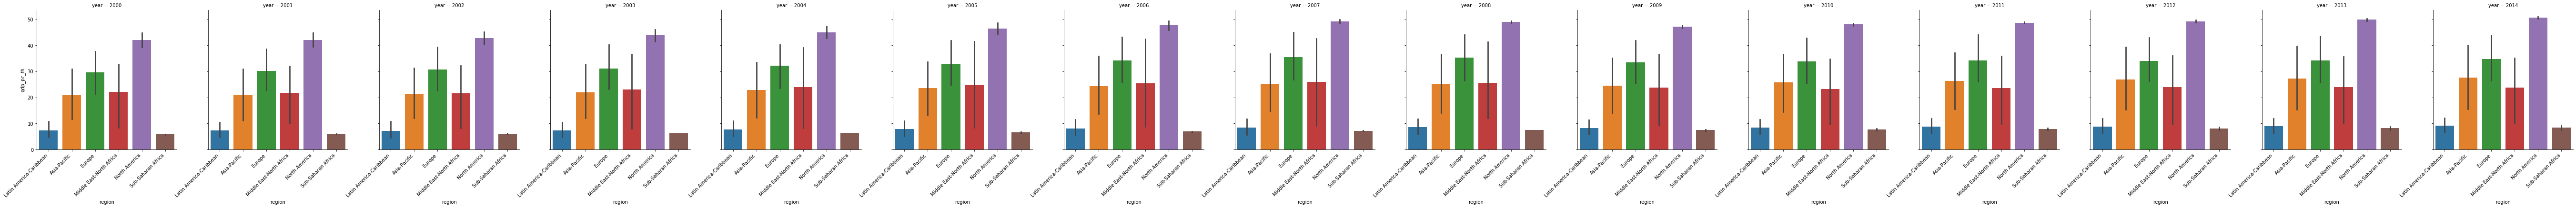

In [20]:
#Аккуратно! Очень много графиков!!! По периодам седние значения ВВП на душу населения с доверительными интервалами
gdp_by_region = sns.catplot(x="region", y="gdp_pc_th", data=main_df, col = "year", kind="bar");
for axes in gdp_by_region.axes.flat: 
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=10, rotation=45, horizontalalignment='right')

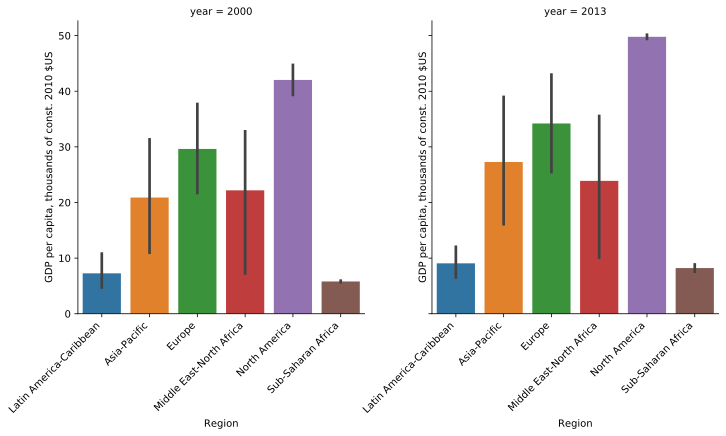

In [78]:
#То же только для 2000 и 2013
gdp_by_region_00_14 = sns.catplot(x="region", y="gdp_pc_th", data=main_df.loc[(main_df['year'] == 2000) + (main_df['year'] == 2013),:], col = "year", kind="bar");
gdp_by_region_00_14.set(xlabel='Region', ylabel='GDP per capita, thousands of const. 2010 $US')
for axes in gdp_by_region_00_14.axes.flat: 
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=10, rotation=45, horizontalalignment='right') 

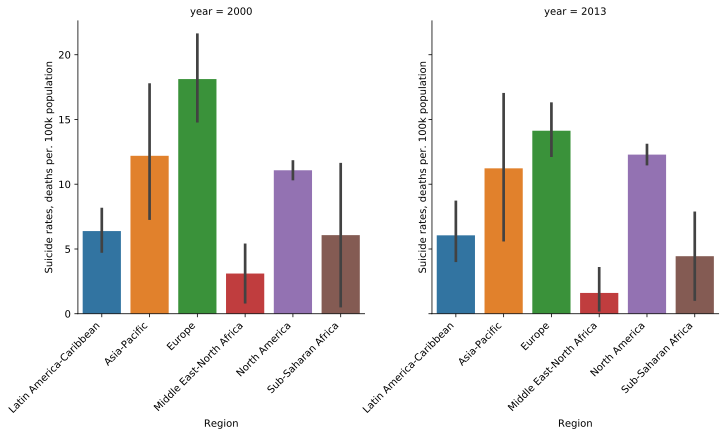

In [141]:
#По периодам седние значения самоубийств на 100к населения с доверительными интервалами
suicide_by_region_00_14 = sns.catplot(x="region", y="suicide_pc", data=main_df.loc[(main_df['year'] == 2000) + (main_df['year'] == 2013),:], col = "year", kind="bar");
suicide_by_region_00_14.set(xlabel='Region', ylabel='Suicide rates, deaths per. 100k population')
for axes in suicide_by_region_00_14.axes.flat: 
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=10, rotation=45, horizontalalignment='right')
    

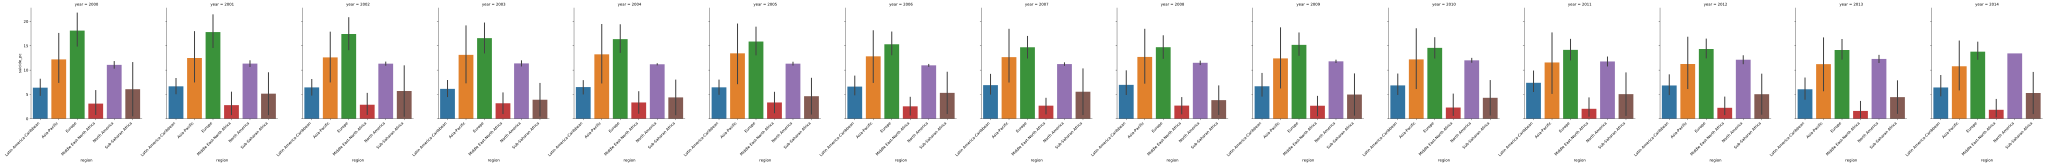

In [68]:
#Аккуратно! Очень много графиков!!! По периодам седние значения самоубийств на 100к населения с доверительными интервалами
suicide_by_region = sns.catplot(x="region", y="suicide_pc", data=main_df, col = "year", kind="bar");
for axes in suicide_by_region.axes.flat: 
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=10, rotation=45, horizontalalignment='right')

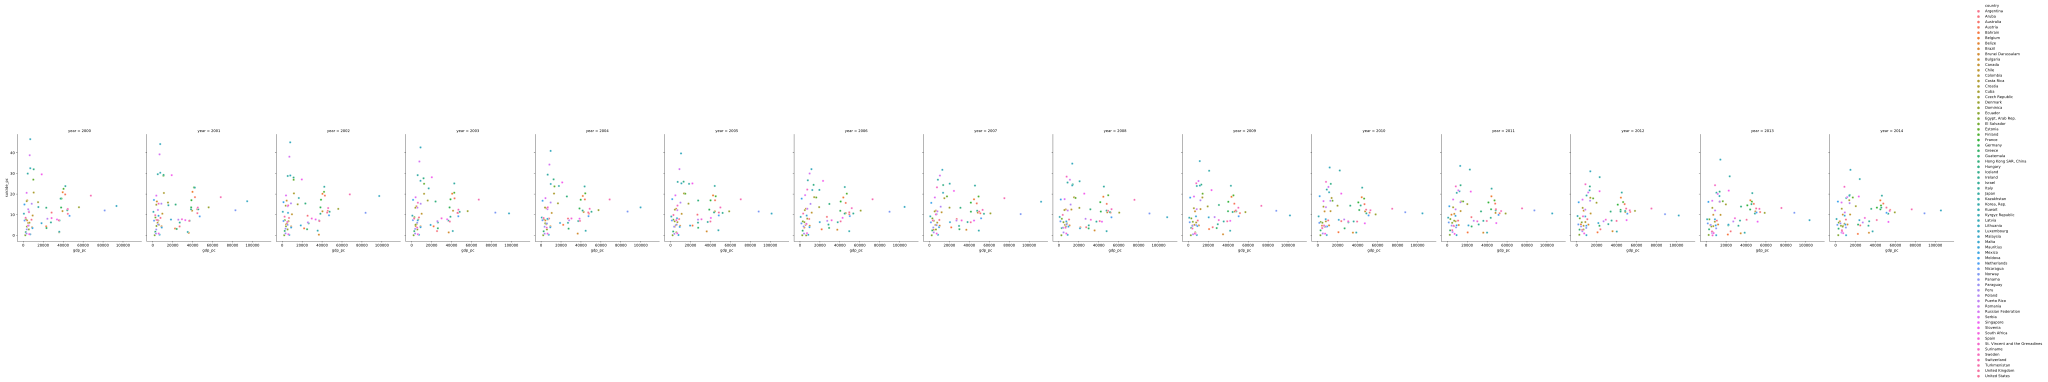

In [69]:
#Аккуратно! Очень много графиков!!! Парная точечная диаграмма самоубийства (rate) и ВВП на душу населения
gdp_suicide = sns.relplot(x="gdp_pc", y="suicide_pc", data = main_df, hue = "country", col = "year");


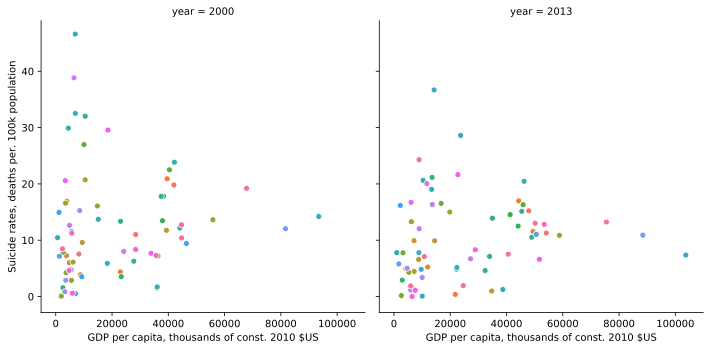

In [79]:
#То же для 2000 и 2013
gdp_suicide_00_14 = sns.relplot(x="gdp_pc", y="suicide_pc", data=main_df.loc[(main_df['year'] == 2000) + (main_df['year'] == 2013),:], hue = "country", col = "year", legend = False)
gdp_suicide_00_14.set(xlabel='GDP per capita, thousands of const. 2010 $US', ylabel='Suicide rates, deaths per. 100k population')

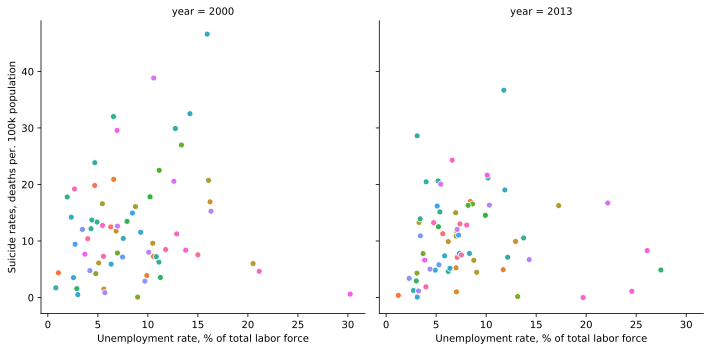

In [76]:
#Теперь то же с безработицей для 2000 и 2013
u_suicide_00_14 = sns.relplot(x="u", y="suicide_pc", data=main_df.loc[(main_df['year'] == 2000) + (main_df['year'] == 2013),:], hue = "country", col = "year", legend = False)
u_suicide_00_14.set(xlabel='Unemployment rate, % of total labor force', ylabel='Suicide rates, deaths per. 100k population')

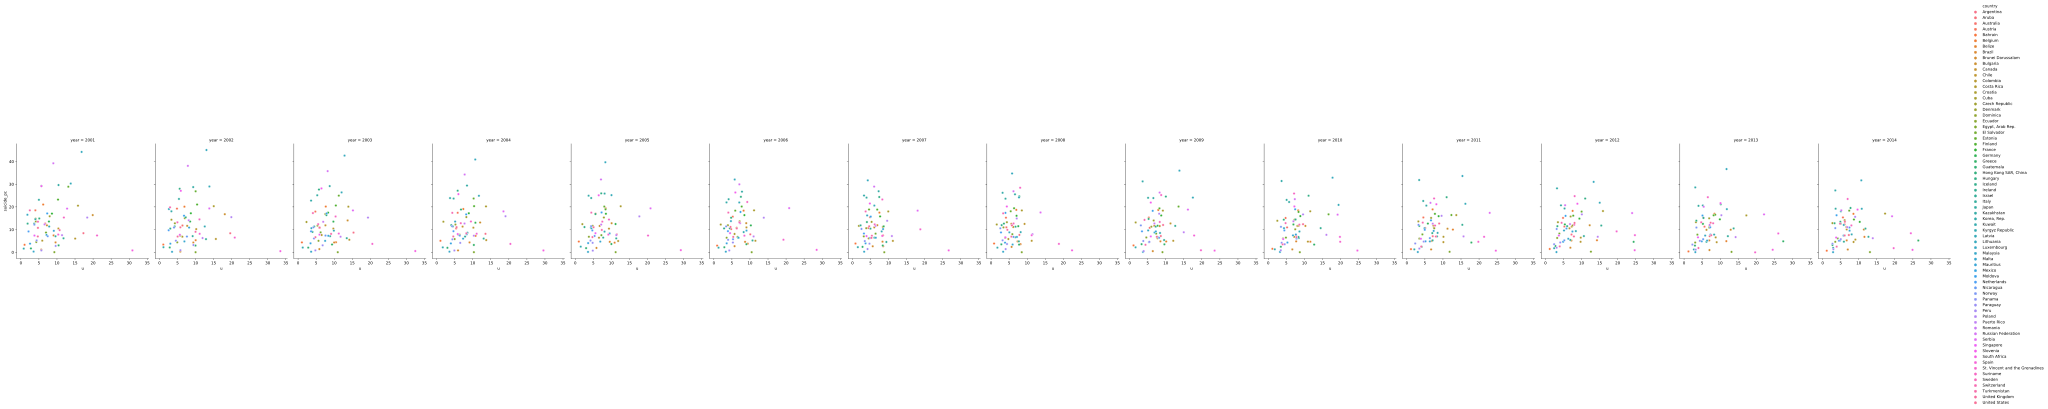

In [142]:
#Аккуратно! Очень много графиков!!! Теперь то же с безработицей.
sns.relplot(x="u", y="suicide_pc", data=main_df.loc[main_df['year'] != 2000, ['country', 'year', 'suicide_pc', 'u']], hue = "country", col = "year");

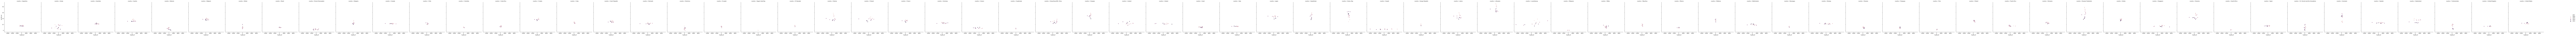

In [24]:
#Аккуратно! Много графиков!!! Теперь то же с приростом ВВП на душу населния для 2000 и 2013
main_df ['d_gdp_pc'] = d_gdp_pc
sns.relplot(x="d_gdp_pc", y="suicide_pc", data=main_df.loc[main_df['year'] != 2000, ['country', 'year', 'suicide_pc', 'd_gdp_pc', 'u']], hue = 'year',col = "country");

In [137]:
#Модели сторятся
fe_only_gdp = PanelOLS.from_formula('suicide_pc ~ 1 + gdp_pc + EntityEffects', panel)
fe_only_u = PanelOLS.from_formula('suicide_pc ~ 1 + u + EntityEffects', panel)
fe_only_soc = PanelOLS.from_formula('suicide_pc ~ 1 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp = PanelOLS.from_formula('suicide_pc ~ 1 + gdp_pc + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_u = PanelOLS.from_formula('suicide_pc ~ 1 + u + fertility + internet + sec_educ  + assaults_pc + EntityEffects', panel)
fe_u_du = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_u = PanelOLS.from_formula('suicide_pc ~ 1 + u + gdp_pc + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_u_te = PanelOLS.from_formula('suicide_pc ~ 1 + u + gdp_pc + fertility + internet + sec_educ + assaults_pc + EntityEffects + TimeEffects', panel)
fe_gdp_u_du = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_dgdp_u_du = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + d_gdp_pc + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_01 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_01_te = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + fertility + internet + sec_educ + assaults_pc + EntityEffects + TimeEffects', panel)
fe_gdp_012 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + gdp_pc_2 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_012_te = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + gdp_pc_2 + fertility + internet + sec_educ + assaults_pc + EntityEffects+TimeEffects', panel)
fe_gdp_0123 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + gdp_pc_2 + gdp_pc_3 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_123 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc_1 + gdp_pc_2 + gdp_pc_3 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_01234 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc + gdp_pc_1 + gdp_pc_2 + gdp_pc_3 + gdp_pc_4 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_12 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc_1 + gdp_pc_2 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_23 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc_2 + gdp_pc_3 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
fe_gdp_34 = PanelOLS.from_formula('suicide_pc ~ 1 + u + u_1 + gdp_pc_3 + gdp_pc_4 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
pooled = PooledOLS(panel['suicide_pc'], panel[['u', 'gdp_pc', 'fertility', 'internet', 'sec_educ']])



In [138]:
#Модели фиттятся
res_fe_only_gdp = fe_only_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_only_u = fe_only_u.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_only_soc = fe_only_soc.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp = fe_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_u = fe_u.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_u_du = fe_u_du.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_u = fe_gdp_u.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_u_te = fe_gdp_u_te.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_u_du = fe_gdp_u_du.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_dgdp_u_du = fe_dgdp_u_du.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_01 = fe_gdp_01.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_01_te = fe_gdp_01_te.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_012 = fe_gdp_012.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_012_te = fe_gdp_012_te.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_0123 = fe_gdp_0123.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_123 = fe_gdp_123.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_01234 = fe_gdp_01234.fit(cov_type='heteroskedastic', has_constant = True)

res_fe_gdp_12 = fe_gdp_12.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_23 = fe_gdp_23.fit(cov_type='heteroskedastic', has_constant = True)
res_fe_gdp_34 = fe_gdp_34.fit(cov_type='heteroskedastic', has_constant = True)

res_pooled = pooled.fit(cov_type='heteroskedastic')

In [139]:
#Здесь выводятся результаты моделей с разными регрессорами (последние три с лагами)
print(res_fe_only_gdp)
print(res_fe_only_u)
print(res_fe_only_soc)
print(res_fe_gdp)
print(res_fe_u)
print(res_fe_u_du)
print(res_fe_gdp_u)
print(res_fe_gdp_u_te)
print(res_fe_gdp_u_du)
print(res_fe_gdp_01)
print(res_fe_gdp_01_te)
print(res_fe_gdp_012_te)

                          PanelOLS Estimation Summary                           
Dep. Variable:             suicide_pc   R-squared:                        0.0758
Estimator:                   PanelOLS   R-squared (Between):             -0.7445
No. Observations:                1033   R-squared (Within):               0.0758
Date:                Thu, Mar 26 2020   R-squared (Overall):             -0.6855
Time:                        22:16:21   Log-likelihood                   -2201.6
Cov. Estimator:                Robust                                           
                                        F-statistic:                      79.028
Entities:                          69   P-value                           0.0000
Avg Obs:                       14.971   Distribution:                   F(1,963)
Min Obs:                       14.000                                           
Max Obs:                       15.000   F-statistic (robust):             43.667
                            

In [47]:
#Здесь выводятся сравнение моделей
print(compare({'(1)':res_fe_only_gdp,'(2)':res_fe_gdp, '(3)':res_fe_u, '(4)':res_fe_u_du, '(5)':res_fe_gdp_u_du}))
print(panel.columns)

                                         Model Comparison                                         
                                   (1)            (2)            (3)            (4)            (5)
--------------------------------------------------------------------------------------------------
Dep. Variable               suicide_pc     suicide_pc     suicide_pc     suicide_pc     suicide_pc
Estimator                     PanelOLS       PanelOLS       PanelOLS       PanelOLS       PanelOLS
No. Observations                  1033            876            861            805            805
Cov. Est.                       Robust         Robust         Robust         Robust         Robust
R-squared                       0.0758         0.2744         0.2844         0.2709         0.2712
R-Squared (Within)              0.0758         0.2744         0.2844         0.2709         0.2712
R-Squared (Between)            -0.7445         0.0887         0.1108         0.1086         0.1292
R-Squared 

In [48]:
#Здесь выводятся результаты моделей с лагами
print(res_fe_dgdp_u_du)
print(res_fe_gdp_01)
print(res_fe_gdp_12)
print(res_fe_gdp_23)
print(res_fe_gdp_34)
print(res_fe_gdp_012)
print(res_fe_gdp_0123)
print(res_fe_gdp_123)
print(res_fe_gdp_01234)

                          PanelOLS Estimation Summary                           
Dep. Variable:             suicide_pc   R-squared:                        0.2721
Estimator:                   PanelOLS   R-squared (Between):              0.1113
No. Observations:                 805   R-squared (Within):               0.2721
Date:                Thu, Mar 26 2020   R-squared (Overall):              0.1269
Time:                        00:03:52   Log-likelihood                   -1525.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      39.206
Entities:                          64   P-value                           0.0000
Avg Obs:                       12.578   Distribution:                   F(7,734)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):             22.400
                            

In [56]:
#Здесь я буду проверять, значимы ли отличия между коэффициентами при переменных u и u_1
panel['u_0and1'] = np.array(panel['u'].tolist()) - np.array(panel['u_1'].tolist())
fe_gdp_01_restr = PanelOLS.from_formula('suicide_pc ~ 1 + u_0and1 + gdp_pc + gdp_pc_1 + fertility + internet + sec_educ + assaults_pc + EntityEffects', panel)
res_fe_gdp_01_restr = fe_gdp_01_restr.fit(cov_type='heteroskedastic', has_constant = True)
print(res_fe_gdp_01_restr)

                          PanelOLS Estimation Summary                           
Dep. Variable:             suicide_pc   R-squared:                        0.2704
Estimator:                   PanelOLS   R-squared (Between):              0.1064
No. Observations:                 805   R-squared (Within):               0.2704
Date:                Thu, Mar 26 2020   R-squared (Overall):              0.1215
Time:                        00:43:31   Log-likelihood                   -1526.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                      38.865
Entities:                          64   P-value                           0.0000
Avg Obs:                       12.578   Distribution:                   F(7,734)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):             22.468
                            

In [30]:
print(compare({'(6)':res_fe_dgdp_u_du,'(7)':res_fe_gdp_01}))

                   Model Comparison                  
                                   (6)            (7)
-----------------------------------------------------
Dep. Variable               suicide_pc     suicide_pc
Estimator                     PanelOLS       PanelOLS
No. Observations                   805            805
Cov. Est.                       Robust         Robust
R-squared                       0.2721         0.2723
R-Squared (Within)              0.2721         0.2723
R-Squared (Between)             0.1113         0.1240
R-Squared (Overall)             0.1269         0.1389
F-statistic                     39.206         34.277
P-value (F-stat)                0.0000         0.0000
=====================     ============   ============
Intercept                       23.519         23.304
                              (14.509)       (13.318)
u                               0.1655         0.1686
                              (3.3074)       (3.1714)
u_1                         

**Межгрупповая модель**

In [31]:
#Модели сторятся
bw_only_gdp = BetweenOLS.from_formula('suicide_pc ~ gdp_pc', panel)
bw_only_soc = BetweenOLS.from_formula('suicide_pc ~ fertility + internet + sec_educ', panel)
bw_gdp = BetweenOLS.from_formula('suicide_pc ~ gdp_pc + fertility + internet + sec_educ', panel)
bw_u = BetweenOLS.from_formula('suicide_pc ~ u + fertility + internet + sec_educ', panel)
bw_gdp_u = BetweenOLS.from_formula('suicide_pc ~ u + gdp_pc + fertility + internet + sec_educ', panel)

In [32]:
#Модели фитятся
res_bw_only_gdp = bw_only_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_bw_only_soc = bw_only_soc.fit(cov_type='heteroskedastic', has_constant = True)
res_bw_gdp = bw_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_bw_u = bw_u.fit(cov_type='heteroskedastic', has_constant = True)
res_bw_gdp_u = bw_gdp_u.fit(cov_type='heteroskedastic', has_constant = True)

In [33]:
#Модели выводятся
print(res_bw_only_gdp)
print(res_bw_only_soc)
print(res_bw_gdp)
print(res_bw_u)
print(res_bw_gdp_u)

                         BetweenOLS Estimation Summary                          
Dep. Variable:             suicide_pc   R-squared:                        0.4210
Estimator:                 BetweenOLS   R-squared (Between):              0.4210
No. Observations:                  69   R-squared (Within):              -0.2309
Date:                Wed, Mar 25 2020   R-squared (Overall):              0.4050
Time:                        22:02:39   Log-likelihood                   -259.59
Cov. Estimator:                Robust                                           
                                        F-statistic:                      49.449
Entities:                          69   P-value                           0.0000
Avg Obs:                       14.971   Distribution:                    F(1,68)
Min Obs:                       14.000                                           
Max Obs:                       15.000   F-statistic (robust):             63.438
                            

**В первых разностях**

In [34]:
fd_only_gdp = FirstDifferenceOLS.from_formula('suicide_pc ~ gdp_pc', panel)
fd_only_soc = FirstDifferenceOLS.from_formula('suicide_pc ~ fertility + internet + sec_educ', panel)
fd_gdp = FirstDifferenceOLS.from_formula('suicide_pc ~ gdp_pc + fertility + internet + sec_educ', panel)
fd_u = FirstDifferenceOLS.from_formula('suicide_pc ~ u + fertility + internet + sec_educ', panel)
fd_gdp_u = FirstDifferenceOLS.from_formula('suicide_pc ~ u + gdp_pc + fertility + internet + sec_educ', panel)

In [35]:
res_fd_only_gdp = fd_only_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_fd_only_soc = fd_only_soc.fit(cov_type='heteroskedastic', has_constant = True)
res_fd_gdp = fd_gdp.fit(cov_type='heteroskedastic', has_constant = True)
res_fd_u = fd_u.fit(cov_type='heteroskedastic', has_constant = True)
res_fd_gdp_u = fd_gdp_u.fit(cov_type='heteroskedastic', has_constant = True)

In [36]:
print(res_fd_only_gdp)
print(res_fd_only_soc)
print(res_fd_gdp)
print(res_fd_u)
print(res_fd_gdp_u)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:             suicide_pc   R-squared:                        0.0019
Estimator:         FirstDifferenceOLS   R-squared (Between):             -0.2312
No. Observations:                 963   R-squared (Within):               0.0329
Date:                Wed, Mar 25 2020   R-squared (Overall):             -0.2245
Time:                        22:02:51   Log-likelihood                   -1767.7
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.8312
Entities:                          69   P-value                           0.1763
Avg Obs:                       14.971   Distribution:                   F(1,962)
Min Obs:                       14.000                                           
Max Obs:                       15.000   F-statistic (robust):             1.4225
                            